In [1]:
import torch 
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt 


In [2]:
transform = transforms.ToTensor()

mnist_data = datasets.MNIST(root= './data', train = True, download= True, transform=transform)

data_load = torch.utils.data.DataLoader(mnist_data, batch_size = 64, shuffle = True)

In [3]:
dataiters = iter(data_load)
images, targets = next(dataiters)
# print(images.shape, targets)

In [4]:
print(images.shape, targets.shape)

torch.Size([64, 1, 28, 28]) torch.Size([64])


In [5]:
class autoencoder_linear(nn.Module) :
    def __init__(self):
        super(autoencoder_linear, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Linear(256, 64),
            nn.ReLU(),
            nn.Linear(64, 3)
        )
        self.decoder = nn.Sequential(
            nn.Linear(3, 64),
            nn.ReLU(),
            nn.Linear(64, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, 28*28),
            nn.Sigmoid()
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded
    

In [6]:
model = autoencoder_linear().to("cuda")
loss_fn = nn.MSELoss().to("cuda")
optimizer = optim.Adam(model.parameters(), lr=0.0001)

In [7]:
num_epochs = 101
for epoch in range(num_epochs):
    for img, _ in data_load:
        img = img.reshape(-1, 28*28).to("cuda")
        pred = model(img)
        loss = loss_fn(pred, img)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
    if epoch%2  == 0 : 
        print(f"Epoch : {epoch + 1}, Loss : {loss.item() : .7f} ")
    


Epoch : 1, Loss :  0.0523808 
Epoch : 3, Loss :  0.0426741 
Epoch : 5, Loss :  0.0384309 
Epoch : 7, Loss :  0.0401643 
Epoch : 9, Loss :  0.0310833 
Epoch : 11, Loss :  0.0335657 
Epoch : 13, Loss :  0.0339391 
Epoch : 15, Loss :  0.0322675 
Epoch : 17, Loss :  0.0310813 
Epoch : 19, Loss :  0.0329324 
Epoch : 21, Loss :  0.0312794 
Epoch : 23, Loss :  0.0288405 
Epoch : 25, Loss :  0.0308535 
Epoch : 27, Loss :  0.0287246 
Epoch : 29, Loss :  0.0319178 
Epoch : 31, Loss :  0.0259366 
Epoch : 33, Loss :  0.0303085 
Epoch : 35, Loss :  0.0347033 
Epoch : 37, Loss :  0.0309384 
Epoch : 39, Loss :  0.0304707 
Epoch : 41, Loss :  0.0303841 
Epoch : 43, Loss :  0.0277942 
Epoch : 45, Loss :  0.0312481 
Epoch : 47, Loss :  0.0269034 
Epoch : 49, Loss :  0.0320003 
Epoch : 51, Loss :  0.0269770 
Epoch : 53, Loss :  0.0267971 
Epoch : 55, Loss :  0.0261558 
Epoch : 57, Loss :  0.0259916 
Epoch : 59, Loss :  0.0265456 
Epoch : 61, Loss :  0.0259028 
Epoch : 63, Loss :  0.0265728 
Epoch : 65, L

In [12]:
torch.save(model.state_dict(), "Autoencoder.pt")

In [22]:
model.load_state_dict(torch.load("Autoencoder.pt"))
model.eval()

autoencoder_linear(
  (encoder): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=256, bias=True)
    (3): ReLU()
    (4): Linear(in_features=256, out_features=64, bias=True)
    (5): ReLU()
    (6): Linear(in_features=64, out_features=3, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=3, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=256, bias=True)
    (3): ReLU()
    (4): Linear(in_features=256, out_features=512, bias=True)
    (5): ReLU()
    (6): Linear(in_features=512, out_features=784, bias=True)
    (7): Sigmoid()
  )
)

In [24]:
target = model(images[0].view(-1).to('cuda'))

In [27]:
target = target.view(28,28).to('cpu').detach().numpy()

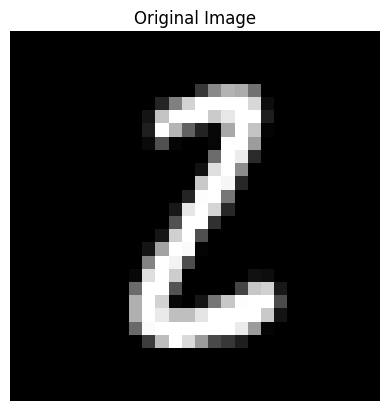

In [33]:
plt.imshow(images[0][0], cmap='gray')
plt.title("Original Image")
plt.axis("off")
plt.show()

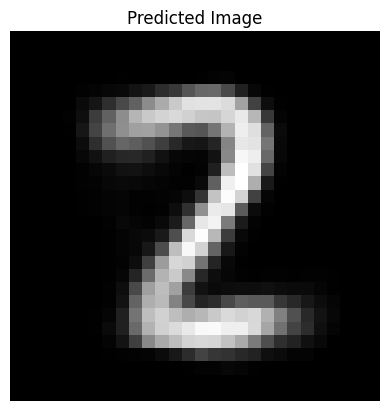

In [32]:
plt.imshow(target, cmap='gray')
plt.title("Predicted Image")
plt.axis("off")
plt.show()